## CREDIT FRAUD DETECTION USING PYTHON FOR MACHINE LEARNING

In [1]:
# Credit Frauds are common in e-commerce sites and other online payment modes. 
# In this project we are detecting credit Fraud using Python for machine learning.
# We need to find out the anormalities for the systems for companies intiating huge transactions. 
# The project will then build a CREDIT CARD FRAUD DETECTION MODEL.

###### Challenges to face in the Project

In [2]:
#There are large amounts of data being processed everyday; there is need to ensure that the model is fast to detect anormalies.
#We will have a huge data of transactions with most of them transactions not fruad hence difficult to detect the fraud ones.
#We will have to search for data as most credi data are private.
#Anothe challenge is misclasified data.

###### How will handle challenges

In [3]:
#Conduct simple and fast way of detecting anormalies.
#Using proper techniques of handling imbalanced data.
#Reducing dimensionality of data for privacy.
#Using dataset from trustworthy source.

###### About the dataset

In [4]:
#This is Kagle dataset. https://www.kaggle.com/mlg-ulb/creditcardfraud?select=creditcard.csv
#The dataset is highly imblanced and consist of 2-day transactions with 492 frauds cases out of 284,807 transactions

###### The Workflow

In [5]:
#We first perfom an exploratory data analysis on the dataset.
#We then creat an ML model after making the dataset ready.
#We using Logistic regression to detect the frauds.
#With the train and evaluate the logistic regression model.
#Logistic regression is one of the simples spam detection supervised learning technique.

#### IMPLEMENTATION

In [8]:
#importing python modules/libararies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report

In [10]:
#loading the dataset
data = pd.read_csv('creditcard.csv')

In [13]:
#Anlysis and visualization of the dataset
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [14]:
data.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [18]:
#missing values
data.isnull() .sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [19]:
#normal/ fraud transaction distribution
data['Class'] .value_counts()

0    284315
1       492
Name: Class, dtype: int64

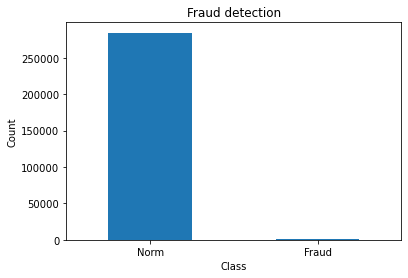

In [24]:
#seprating normal and fraud transactions
norm = data[data.Class == 0]
fraud =data[data.Class == 1]
#shape
norm.shape
fraud.shape
#visualization
labels = ["Norm", "Fraud"]
count_classes = data.value_counts(data['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Fraud detection")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

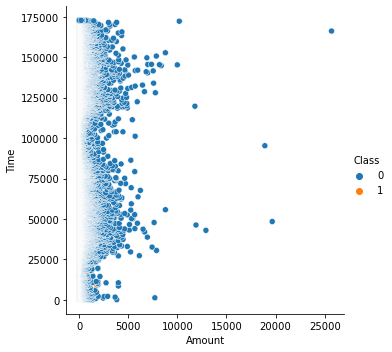

In [26]:
#Statistical data measures
norm.Amount.describe()
fraud.Amount.describe()
# seaborn visualization
sns.relplot(x = 'Amount' , y = 'Time' , hue = 'Class', data = data)

In [29]:
# Compare transaction values
data.groupby('Class').mean()

#building  dataset containing similar distribution of normal and fraud transactions
norm_sample = norm.sample(n=492)

# Concatinating data
new_data = pd.concat([norm_sample, fraud], axis=0)
new_data

# Analyzing new dataset
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [34]:
# Splitting data 
X = new_data.drop('Class', axis=1)
Y = new_data['Class']

# splitting the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify = Y, random_state= 2)
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [36]:
#create model
model = LogisticRegression()
# train model
model.fit(X_train,Y_train)

# Model Evaluation
X_train_pred = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_pred, Y_train)
print('Accuracy of Training data:', training_data_accuracy)

Accuracy of Training data: 0.9275730622617535


In [37]:
# classification report
classification_report(X_train_pred, Y_train)

'              precision    recall  f1-score   support\n\n           0       0.96      0.90      0.93       418\n           1       0.90      0.96      0.93       369\n\n    accuracy                           0.93       787\n   macro avg       0.93      0.93      0.93       787\nweighted avg       0.93      0.93      0.93       787\n'

In [38]:
# test data accuracy:
X_test_pred = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred, Y_test)
print('Accuracy of Testing data:', test_data_accuracy)

# confusion matrix and classification report
print(confusion_matrix(X_test_pred, Y_test))
print(classification_report(X_test_pred, Y_test))

Accuracy of Testing data: 0.9035532994923858
[[94 14]
 [ 5 84]]
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       108
           1       0.86      0.94      0.90        89

    accuracy                           0.90       197
   macro avg       0.90      0.91      0.90       197
weighted avg       0.91      0.90      0.90       197



##### Our model accuracy on test data is  0.9035532994923858 which translates to 90.36% This model can considerable detect both normal and fraud transactions.